In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic') # 한글 폰트 설정
plt.rc('axes',unicode_minus=False) #폰트가 깨져서 설정

%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina') #선명하게 할려고

In [4]:
df = pd.read_csv("D:/jupyter/부스트코스/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv",encoding="UTF8", engine='python')

In [5]:
df.shape

(91335, 39)

In [6]:
# shift +tab 키를 누르면 공식 문서(설명)를 볼 수 있다.
df.head(1) 

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


In [7]:
df.tail(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.80664


In [8]:
df.info() #숫자 차이는 결측치

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
상가업소번호       91335 non-null int64
상호명          91335 non-null object
지점명          1346 non-null object
상권업종대분류코드    91335 non-null object
상권업종대분류명     91335 non-null object
상권업종중분류코드    91335 non-null object
상권업종중분류명     91335 non-null object
상권업종소분류코드    91335 non-null object
상권업종소분류명     91335 non-null object
표준산업분류코드     86413 non-null object
표준산업분류명      86413 non-null object
시도코드         90956 non-null float64
시도명          90956 non-null object
시군구코드        90956 non-null float64
시군구명         90956 non-null object
행정동코드        91335 non-null int64
행정동명         90956 non-null object
법정동코드        91280 non-null float64
법정동명         91280 non-null object
지번코드         91335 non-null int64
대지구분코드       91335 non-null int64
대지구분명        91335 non-null object
지번본번지        91335 non-null int64
지번부번지        72079 non-null float64
지번주소         91335 non-null object
도로명코드        91335

In [9]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [10]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 3.3 결측치

In [11]:
null_count=df.isnull().sum()

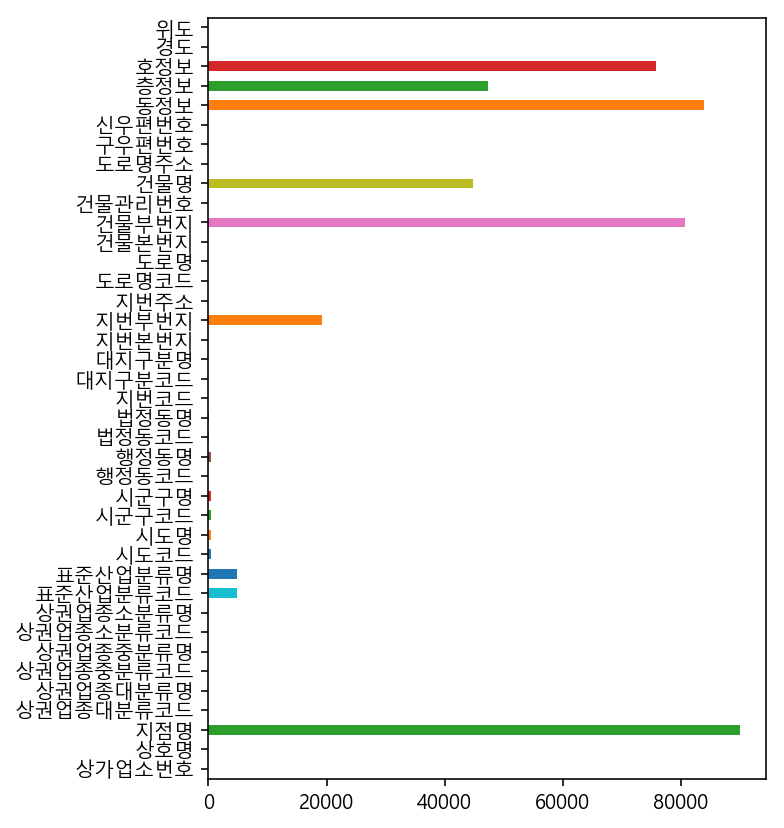

In [12]:
null_count.plot.barh(figsize=(5,7))

In [13]:
#reset_index() df 형태로 바꿈
df_null_count=null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [14]:
df_null_count.columns = ["컬럼명","결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [1]:
df_null_count_top =df_null_count.sort_values(by="결측치수",ascending=False)
df_null_count_top

NameError: name 'df_null_count' is not defined

In [16]:
# NAN == Not a Nuber
df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [17]:
# tolist는 리스트로 변경
drop_columns=df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [18]:
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


In [19]:
print(df.shape)
df=df.drop(drop_columns, axis=1) # 열을 기준으로
print(df.shape)

(91335, 39)
(91335, 29)


In [20]:
df.info()
# 메모리 용량이 줄어듬

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
상가업소번호       91335 non-null int64
상호명          91335 non-null object
상권업종대분류코드    91335 non-null object
상권업종대분류명     91335 non-null object
상권업종중분류코드    91335 non-null object
상권업종중분류명     91335 non-null object
상권업종소분류코드    91335 non-null object
상권업종소분류명     91335 non-null object
시도명          90956 non-null object
시군구코드        90956 non-null float64
시군구명         90956 non-null object
행정동코드        91335 non-null int64
행정동명         90956 non-null object
법정동코드        91280 non-null float64
법정동명         91280 non-null object
지번코드         91335 non-null int64
대지구분코드       91335 non-null int64
대지구분명        91335 non-null object
지번본번지        91335 non-null int64
지번주소         91335 non-null object
도로명코드        91335 non-null int64
도로명          91335 non-null object
건물본번지        91335 non-null int64
건물관리번호       91335 non-null object
도로명주소        91335 non-null object
구우편번호        91323 no

## 3.4 기술통계

In [21]:
# 기초통계수치
df["위도"].mean()

36.62471119236673

In [22]:
df["위도"].median()
# 최대 최소의 영향이 없다.

37.23465231770329

In [23]:
df["위도"].max()

38.499658570559795

In [24]:
df["위도"].min()

33.2192896688307

In [25]:
df["위도"].count()

91335

In [26]:
df["위도"].describe()
# 1사분위수 25%

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [27]:
df[["위도","경도"]].describe()
# 연속형변수 일 때 더욱 더 좋음

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [28]:
# 문자열 데이터타입의 요약
# top 은 빈도수가 가장 높은거
# freq  top의 빈도수
# 결측치는 빼고 보여줌
df.describe(include="object")
# df.describe(include="all") 모든 데이터를 다 보여줌

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


## 3.5 pandas로 시각화

In [29]:
df["상권업종대분류명"].unique()  #중복된 값을 제외하고 보여줌

array(['의료'], dtype=object)

In [30]:
df["상권업종대분류명"].nunique()

1

In [31]:
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [32]:
df["상권업종중분류명"].nunique()

5

In [33]:
df["상권업종소분류명"].unique()
# 대중소 가 있다고 하면 groupby로 해야 겠다고 바로 생각이 들어야 함
# 소분류가 중분류에 어떻게 들어가는지 ?? 
# 중분류를 보고 소분류가 어떠한 것이 인지 알아야 한다.
# 분류가 어떻게 들어가는지 쪼개봐야 한다.

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [34]:
df["상권업종소분류명"].nunique()

34

In [35]:
len(df["상권업종소분류명"].unique())

34

In [36]:
df['시도명'].head()

0      경기도
1    서울특별시
2      경기도
3    부산광역시
4      경기도
Name: 시도명, dtype: object

In [37]:
city = df['시도명'].value_counts()
# 중복값의 갯수
city

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [38]:
city_normalize=df['시도명'].value_counts(normalize=True)
#비율을 알 수있음
city_normalize

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

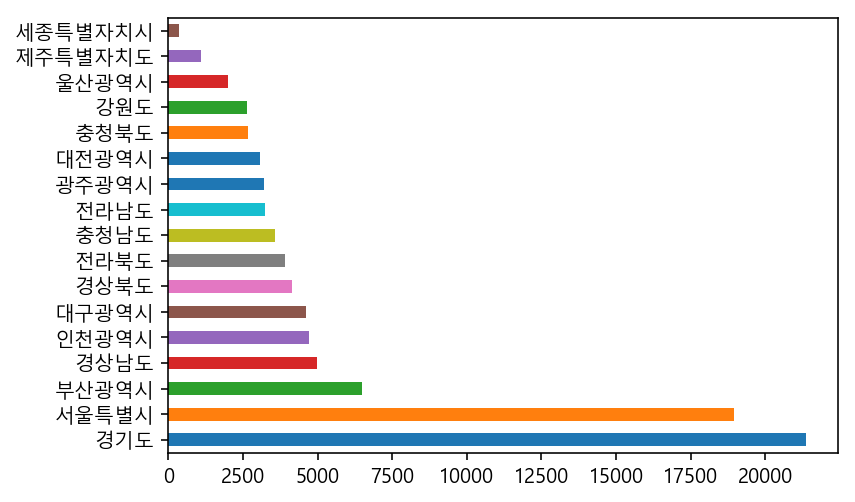

In [39]:
city.plot.barh()

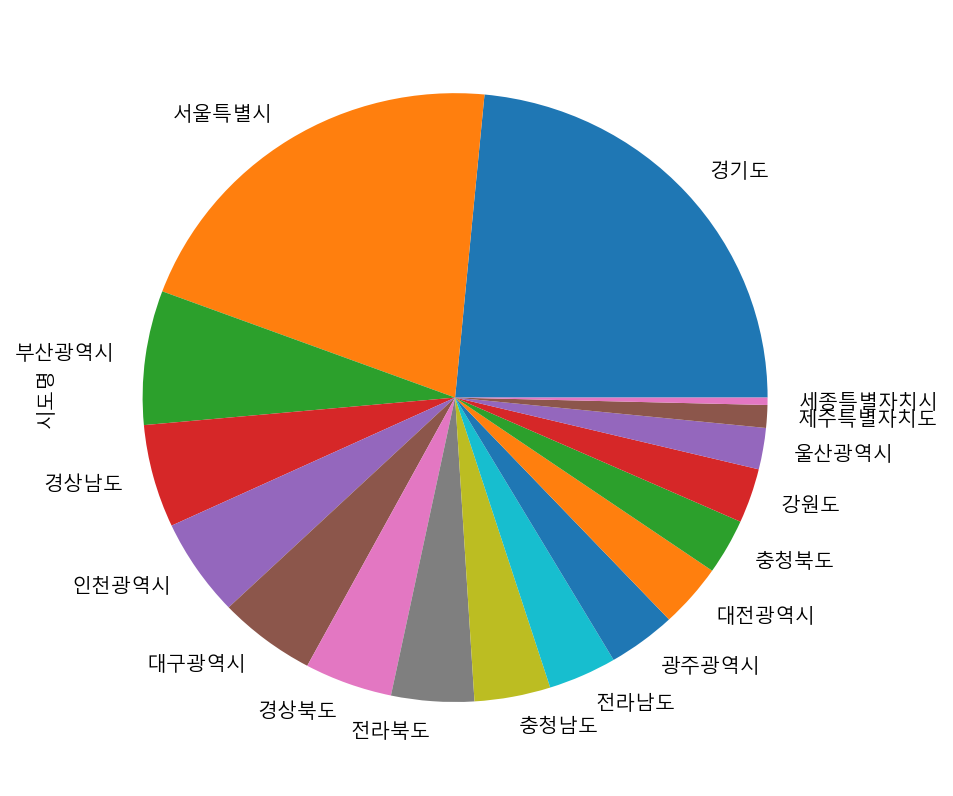

In [40]:
city_normalize.plot.pie(figsize=(7,7))
# 막대가 더 적합하다.
# pie 차트는 오해의 소지가 있고 비율을 안나타내면 모른다. (seaborn에도 없고 개발 계획X)

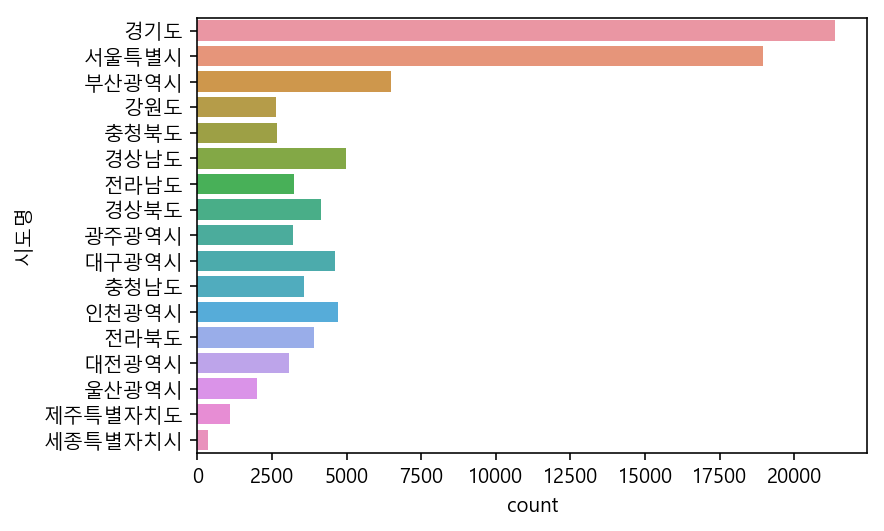

In [41]:
c=sns.countplot(data=df,y="시도명") 
#그래프 내부에서 count를 함 (편리함) 고급통계기능
# 시간이 오래걸림(데이터양에 비례)

In [42]:
df["상권업종대분류명"].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [43]:
c=df["상권업종중분류명"].value_counts()
c

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [44]:
n=df["상권업종중분류명"].value_counts(normalize=True)
n

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

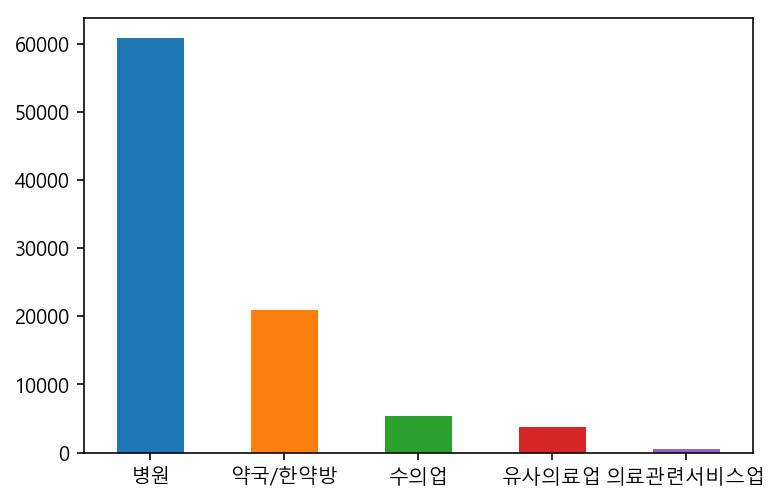

In [45]:
c.plot.bar(rot=0)
# rot는 레이블 값을 얼마나 회전을 시킬 것인지?

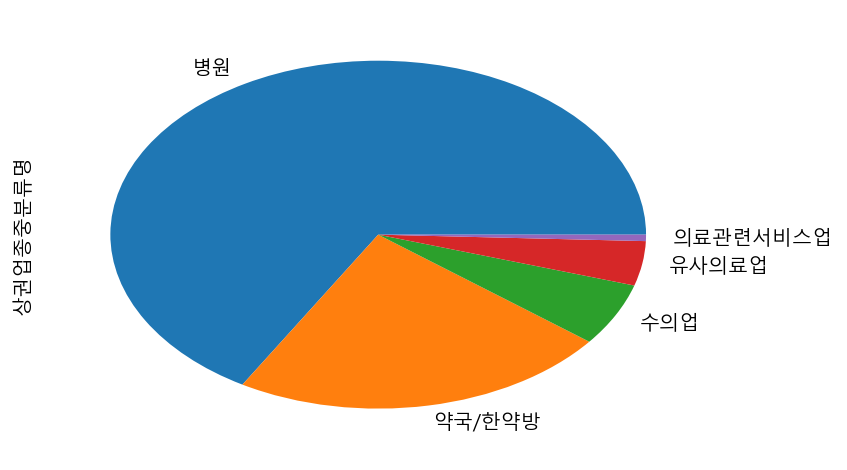

In [46]:
n.plot.pie()

In [47]:
c=df["상권업종소분류명"].value_counts()

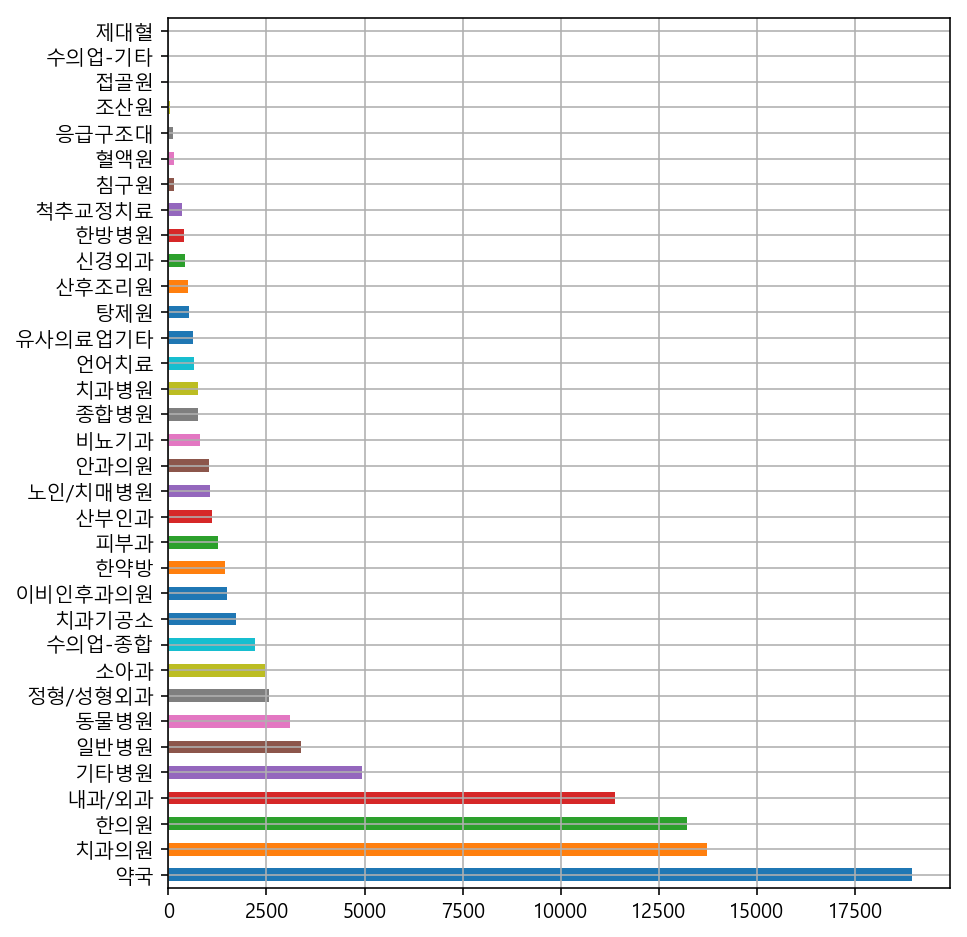

In [48]:
c.plot.barh(figsize=[7,8],grid=True)

## 3.7 데이터 색인하기

In [49]:
df_medical=df[df["상권업종중분류명"] == "약국/한약방"].copy()
df_medical.head(1)
# mask 한다고 함
# copy를 안하면 medical 값이 변하면 df도 같이 변함

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,...,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528


In [50]:
df.loc[df["상권업종대분류명"] == "의료","상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [51]:
m = df["상권업종대분류명"] == "의료"
df.loc[m,"상권업종중분류명"].value_counts()
# 의료에서서 상권업종중류명만

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [52]:
df[df["상권업종중분류명"]=="유사의료업"].shape

(3774, 29)

In [53]:
df_medi=df[df["상권업종중분류명"]=="유사의료업"]
df_medi.shape

(3774, 29)

In [54]:
df["상호명"].value_counts().head(10)

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [55]:
df_medi["상호명"].value_counts().head(10)

리원           32
고려수지침        22
대한적십자사       17
헌혈의집         12
고려수지침학회      10
수치과기공소       10
제일치과기공소       9
스마일치과기공소      8
대한응급환자이송단     8
이사랑치과기공소      8
Name: 상호명, dtype: int64

In [56]:
#and 연산자 사용 &
df_seoul_drug = df[(df["상권업종소분류명"] == "약국") & (df["시도명"] == "서울특별시")]
print(df_seoul_drug.shape)
df_seoul_drug.head(1)

(3579, 29)


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,...,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656


## 3.8 텍스트 데이터 전처리하기

In [57]:
c=df_seoul_drug["시군구명"].value_counts()
c.head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

In [58]:
n=df_seoul_drug["시군구명"].value_counts(normalize=True)
n.head()

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: 시군구명, dtype: float64

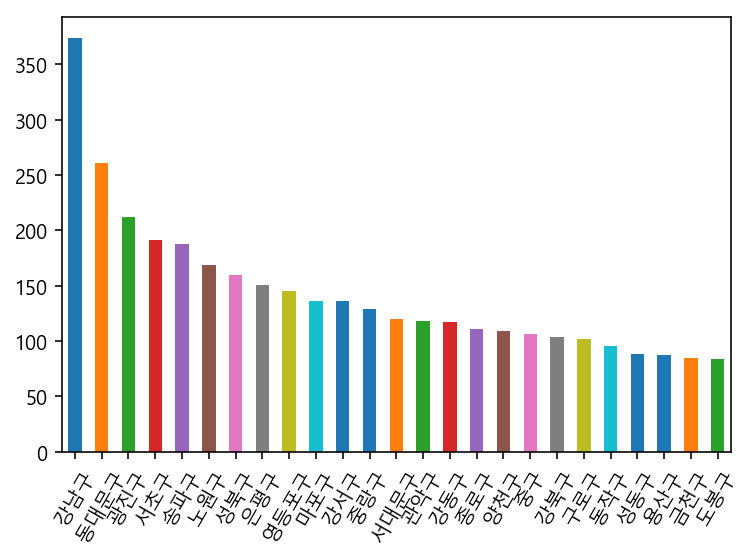

In [59]:
c.plot.bar(rot=60)
# 60도 정도 기울림

In [60]:
# 종합병원이 없는 지역이 어디인지?
# 연산자 우선순위 때문에 괄호 해야함
df_seoul_hospital=df[(df["상권업종소분류명"]=="종합병원")&(df["시도명"]=="서울특별시")].copy()
df_seoul_hospital.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,서울특별시,11215.0,...,서울특별시 광진구 중곡동 58-25,112153104006,서울특별시 광진구 긴고랑로,119,1121510100100580025000733,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048
353,20471487,홍익병원별관,S,의료,S01,병원,S01B01,종합병원,서울특별시,11470.0,...,서울특별시 양천구 신정동 897-13,114702005008,서울특별시 양천구 국회대로,250,1147010100108970013001044,서울특별시 양천구 국회대로 250,158070.0,7937.0,126.862805,37.529213
385,20737057,SNUH,S,의료,S01,병원,S01B01,종합병원,서울특별시,11680.0,...,서울특별시 강남구 역삼동 736-55,116804166727,서울특별시 강남구 테헤란로26길,10,1168010100107360055027688,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,...,서울특별시 영등포구 여의도동 62,115603118001,서울특별시 영등포구 63로,10,1156011000100620000031477,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296
2461,20024045,한양,S,의료,S01,병원,S01B01,종합병원,서울특별시,11200.0,...,서울특별시 성동구 행당동 15-1,112003103002,서울특별시 성동구 마조로,22,1120010700100150001019623,서울특별시 성동구 마조로 22-2,133070.0,4763.0,127.041325,37.559469


In [61]:
df_seoul_hospital["시군구명"].value_counts()
# 종합병원은 강남구에 제일 많다.

강남구     15
영등포구     8
광진구      6
서초구      6
송파구      5
강동구      5
중구       5
서대문구     4
강북구      4
양천구      4
도봉구      4
성북구      3
성동구      2
구로구      2
노원구      2
종로구      2
중랑구      2
강서구      2
관악구      2
동대문구     2
금천구      2
은평구      1
동작구      1
마포구      1
용산구      1
Name: 시군구명, dtype: int64

In [62]:
# ~ 아닌 것만 가져옴 (false)만 가져옴
# str.contains 는 문자가 포함되어 있는지?
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"),"상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [63]:
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 551,116504163330,서울특별시 서초구 사평대로28길,55,1165010700105510000017194,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 547-6,116504163242,서울특별시 서초구 반포대로39길,56,1165010700105470006016762,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,127.001756,37.499095


In [64]:
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("의료기")]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,...,서울특별시 영등포구 여의도동 62,115603118001,서울특별시 영등포구 63로,10,1156011000100620000031477,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296


In [65]:
# or 로 아닌 것만 가지고 옴
# index는 왠만해서는 안변해서 index를 많이 이용함
drop_row=df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례시작|상담소|어린이집")].index
drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 60645]

In [66]:
# 의원으로 끝나는 데이터
drop_row2=df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("의원")].index
drop_row2=drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [67]:
drop_row=drop_row + drop_row2

In [68]:
len(drop_row)

29

In [69]:
print(df_seoul_hospital.shape)
df_seoul_hospital=df_seoul_hospital.drop(drop_row,axis=0)
print(df_seoul_hospital.shape)

(91, 29)
(62, 29)


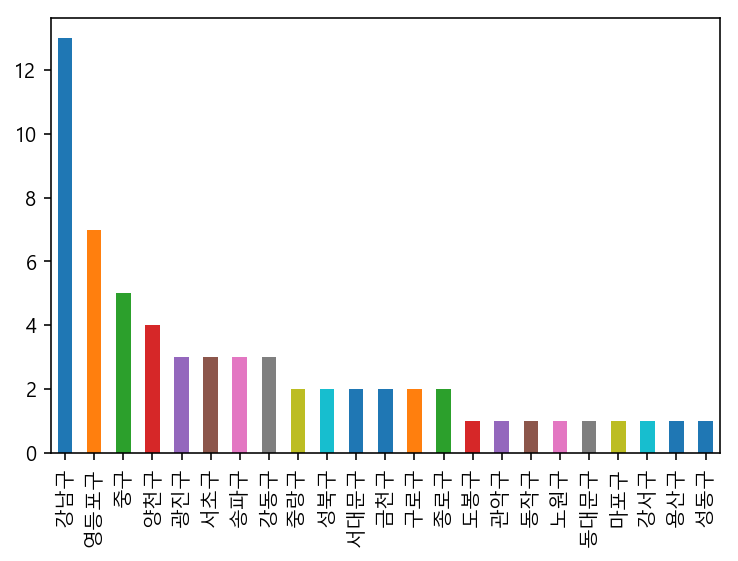

In [70]:
df_seoul_hospital["시군구명"].value_counts().plot.bar()

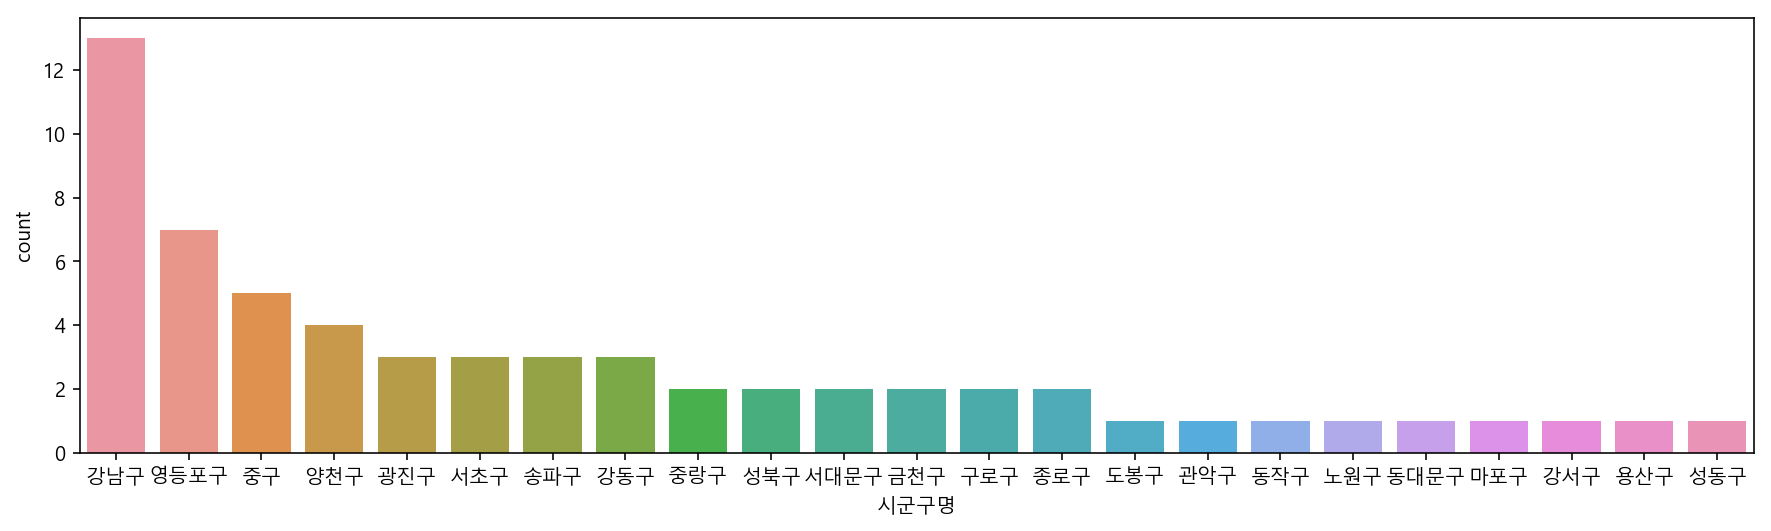

In [71]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul_hospital, x="시군구명",order=df_seoul_hospital["시군구명"].value_counts().index)
# order 무엇을 기준으로

## 3.9 위경도 데이터 scatterplot

In [72]:
df_seoul=df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(18943, 29)

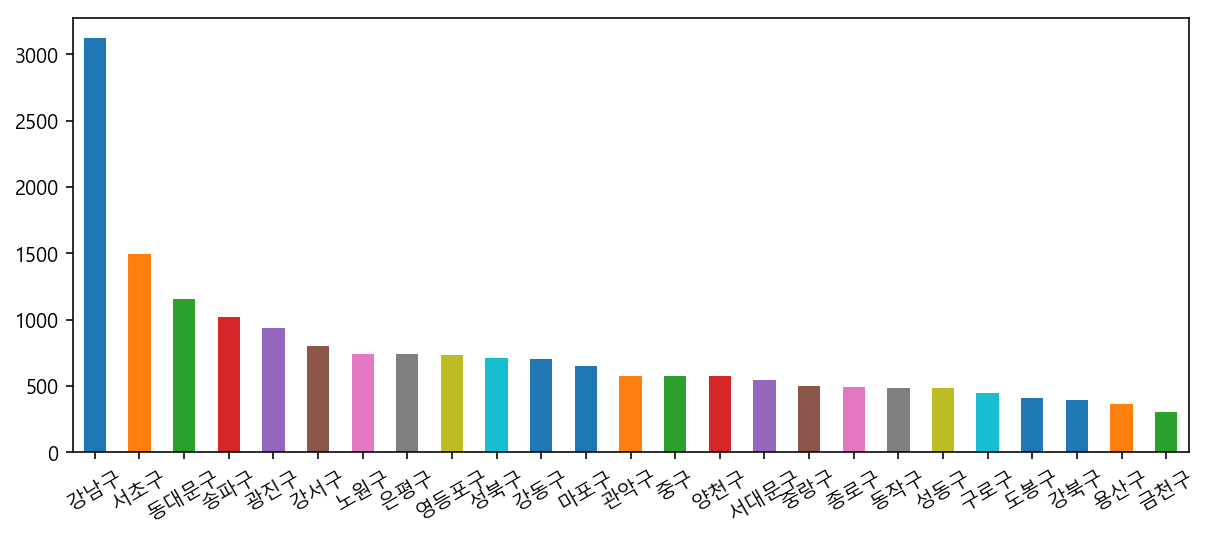

In [73]:
df_seoul["시군구명"].value_counts().plot.bar(figsize=(10,4),rot=30)

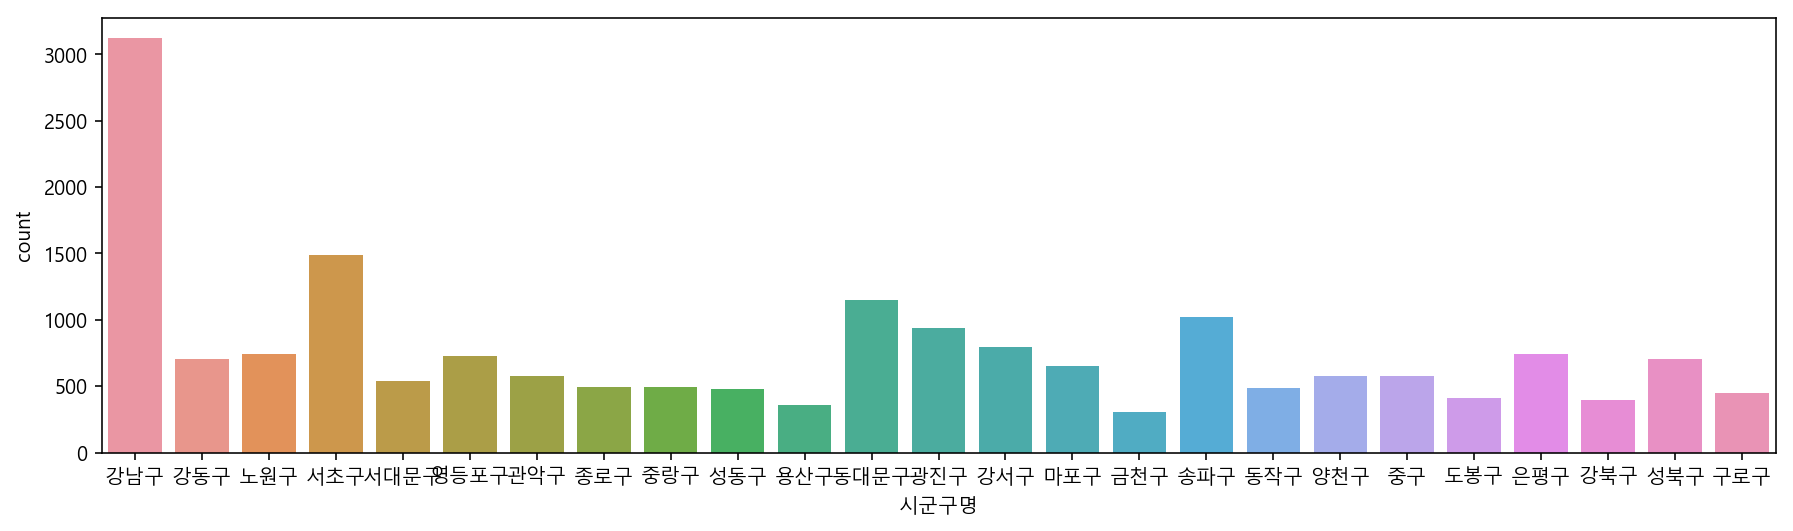

In [74]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul,x="시군구명")

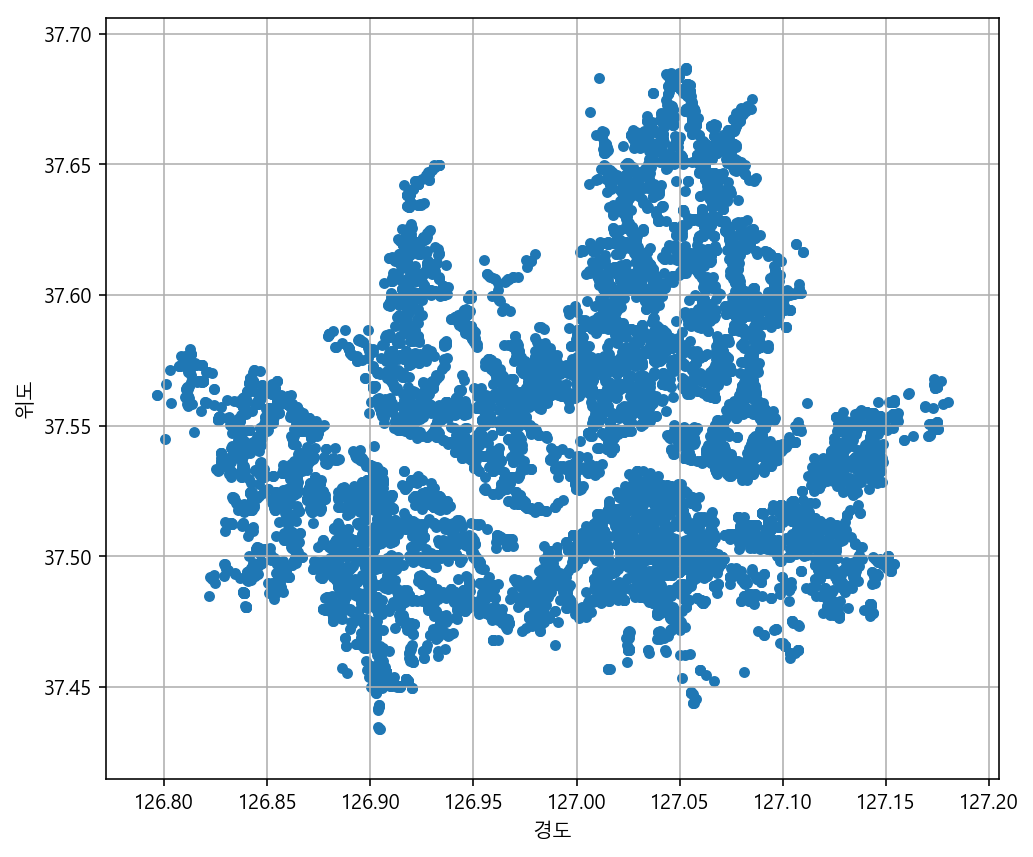

In [75]:
df_seoul[["경도","위도","시군구명"]].plot.scatter(x="경도",y="위도",figsize=(8,7),grid=True)
# 산과 강을 없고 강남구가 몰린것을 보여줌
# 서울시 지도모양

In [76]:
plt.figure(figsize=(9,8))
sns.scatterplot(data=df_seoul, x="경도",y="위도",hue="시군구명")
# hue =  포토샵 기능으로 색상 넣움

AttributeError: module 'seaborn' has no attribute 'scatterplot'

<Figure size 648x576 with 0 Axes>

In [78]:
import folium
# m.sava = html 파일로 저장 가능
# marker  마커 기능도 제공 색상 모양도 다르게 가능하고 안내문도 넣을 수 있다.

In [80]:
df_seoul_hospital["위도"].mean()
df_seoul_hospital["경도"].mean()

126.99861635482705

In [85]:
df_seoul_hospital.tail(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
90788,16162338,성베드로병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11680.0,...,서울특별시 강남구 도곡동 910-27,116802000003,서울특별시 강남구 남부순환로,2649,1168011800109100027000895,서울특별시 강남구 남부순환로 2649,135859.0,6271.0,127.039567,37.485604


In [89]:
map =folium.Map(location=[df_seoul_hospital["위도"].mean(),df_seoul_hospital["경도"].mean()],zoom_start=12)
# 지도의 중심을 서울로 잡음
map

In [94]:

for n in df_seoul_hospital.index:
    name =df_seoul_hospital.loc[n, "상호명"]
    address =df_seoul_hospital.loc[n, "도로명주소"]
    popup =f"{name}-{address}" # 상호명 주소 연결
    location = [df_seoul_hospital.loc[n, "위도"],df_seoul_hospital.loc[n, "경도"]]
    folium.Marker(
        location = location, popup = popup, encoding='UTF8'
    ).add_to(map)
map.save('index.html')
map
# 강남에 좀 모여있고 외곽으로 갈 수록 없다.

